## DonorsChoose Funding Analysis 
<br>
DonorsChoose is an innovative platform that connects donors with teachers from across the United States to fund school projects. These projects range from simple supplies for a science experiment to funds for field trips, providing resources that schools otherwise might not afford. In this project, you will analyze data from the DonorsChoose platform to identify patterns in funding, project success, and factors that influence donor contributions.



Download the specified CSV files from Canvas and load them into Python for analysis.

In [20]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
# Load data
project = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/project.csv")

donation = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/donation.csv")

school = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/school.csv")

account = pd.read_csv("/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/account.csv",dtype={5: str}) #requires data type specification for column 5

FileNotFoundError: [Errno 2] No such file or directory: "/Users/wally/Library/CloudStorage/OneDrive-Personal/Documents/Cornell/0. MPS (4th year sem 2)/MPS Spring '24/NBA 6215 Python for Business/data_for_final_project/project.csv"

In [ ]:
# Rename columns for consistency with other files
donation = donation.rename(columns={'donoracctid':'accountid'})
project = project.rename(columns={'teacheracctid':'accountid'})

In [ ]:
# Merge files to a combined dataframe
tmp0 = project.merge(donation, on=['accountid', 'projectid'], how='outer')
tmp1 = tmp0.merge(school, on='schoolid', how='outer')
combined_df = tmp1.merge(account,on='accountid', how='outer')

In [ ]:
# Remove NA values from the donation_to_project column (imperative column)
combined_df = combined_df.dropna(subset=['donation_to_project'])

In [ ]:
# Sort by accountid
pd.set_option('display.max_columns', 500)
combined_df.sort_values('accountid')

# Show df
combined_df

,projectid,accountid,schoolid,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,vendor_shipping_charges,sales_tax,payment_processing_charges,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration,donationid,donation_timestamp,donation_to_project,donation_optional_support,donation_total,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,is_teacher_referred,givingpageid,giving_page_type,for_honoree,thank_you_packet_mailed,ncesid,latitude,longitude,city_x,state_x,zip,metro,district,county,charter,magnet,year_round,nlns,kipp,charter_ready_promise,city_y,state_y,zip3,is_teacher,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow
68,147974.0,14659,2.0,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 9-12,32.14,0.0,4.82,9.0,367.35,447.99,200.0,447.99,3.0,1.0,0.0,completed,2009-08-12 00:00:00,2009-09-08 00:00:00,2009-12-04 00:00:00,2010-01-13 00:00:00,4905337.0,2009-08-21 09:06:42,20.50,4.50,25.0,1.0,creditcard,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.765517,-73.96009,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
74,212598.0,14659,2.0,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Other,highest poverty,Grades 9-12,22.56,0.0,3.38,35.0,286.54,329.36,200.0,325.62,6.0,0.0,1.0,completed,2010-07-23 00:00:00,2010-09-08 00:00:00,2011-01-18 00:00:00,2010-12-23 00:00:00,3409988.0,2010-09-02 22:15:55,43.50,6.50,50.0,1.0,creditcard,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.765517,-73.96009,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
90,802020.0,14659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556299.0,2015-02-13 14:58:54,42.50,7.50,50.0,1.0,no_cash_received,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
91,778850.0,14659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,935423.0,2014-12-02 17:51:10,8.50,1.50,10.0,1.0,paypal,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
105,110794.0,34241,3.0,Literacy,Literacy & Language,Special Needs,Special Needs,Technology,moderate poverty,Grades PreK-2,23.32,0.0,5.83,17.0,279.00,340.24,25.0,348.75,2.0,0.0,0.0,completed,2008-11-22 00:00:00,2009-04-21 00:00:00,2009-04-24 00:00:00,2009-04-23 00:00:00,2725696.0,2008-12-12 20:17:57,20.00,5.00,25.0,1.0,no_cash_received,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,3.600077e+11,40.770233,-73.95076,New York City,NY,10075.0,NaN,New York City Dept Of Ed,New York (Manhattan),0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179429,70405.0,2855583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6211919.0,2008-03-31 14:12:13,85.00,15.00,100.0,1.0,no_cash_received,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Hollywood,CA,900.0,0.0,NaN,NaN,NaN
7179430,1084050.0,2855584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62

## Basic Data Examination

##### % Teachers in the dataframe as opposed to donors

In [ ]:
sum(combined_df['is_teacher'])/len(combined_df)

0.14846402646766976

##### Number of Cities and Schools per City

In [ ]:
combined_df_filtered_by_city = combined_df.dropna(subset="city_x")
city_school_counts = combined_df_filtered_by_city['city_x'].value_counts()
city_school_counts

city_x
New York City    30097
Los Angeles      12684
Chicago          12640
Philadelphia      6533
Indianapolis      5370
                 ...  
Unalakleet           1
Parmelee             1
Cankton              1
Halliday             1
Shasta Lake          1
Name: count, Length: 7254, dtype: int64

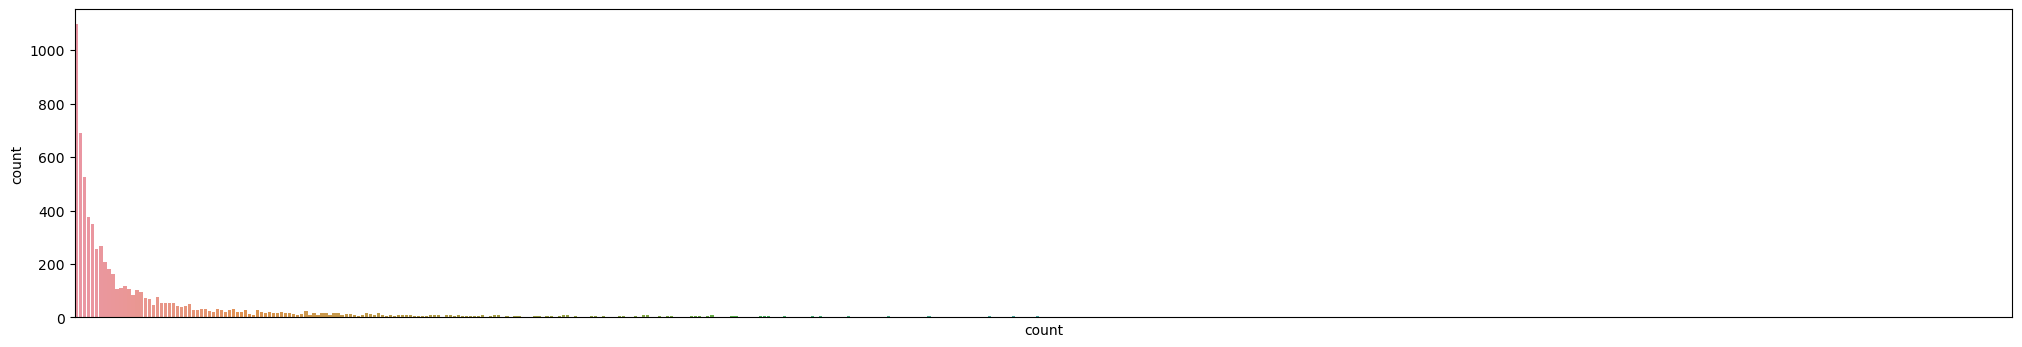

In [ ]:
plt.figure(figsize=(25, 4))
sns.countplot(x=city_school_counts)
plt.xticks([])
plt.show()  # There is a long tail

## Examine effect of being a NY Teaching Fellow on donation amounts

In [ ]:
# Remove NA values from teachng fellow column
teaching_fellow_na_removed = combined_df.dropna(subset=['teacher_ny_teaching_fellow'])

# Filter by unique results (whether or not teacher is NY fellow)
unique_teaching_fellow = teaching_fellow_na_removed['teacher_ny_teaching_fellow'].unique()

# Create filtered datasets containing only data if the teacher is a teaching fellow or not
for i in unique_teaching_fellow:
    if i == 0:
        is_not_ny_teaching_fellow = teaching_fellow_na_removed[teaching_fellow_na_removed['teacher_ny_teaching_fellow']==i]
    if i == 1:
        is_ny_teaching_fellow = teaching_fellow_na_removed[teaching_fellow_na_removed['teacher_ny_teaching_fellow']==i]

In [ ]:
# See summary stats
print("NOT a NY Teaching Fellow")
print(is_not_ny_teaching_fellow["donation_to_project"].describe())

print("\nIS a NY Teaching Fellow")
print(is_ny_teaching_fellow["donation_to_project"].describe())

NOT a NY Teaching Fellow
count    873348.000000
mean         40.322972
std         235.561233
min           0.000000
25%           1.700000
50%          10.000000
75%          28.900000
max       21299.950000
Name: donation_to_project, dtype: float64

IS a NY Teaching Fellow
count    8179.000000
mean       57.010252
std       148.054790
min         0.020000
25%         8.500000
50%        24.540000
75%        75.000000
max      8500.000000
Name: donation_to_project, dtype: float64


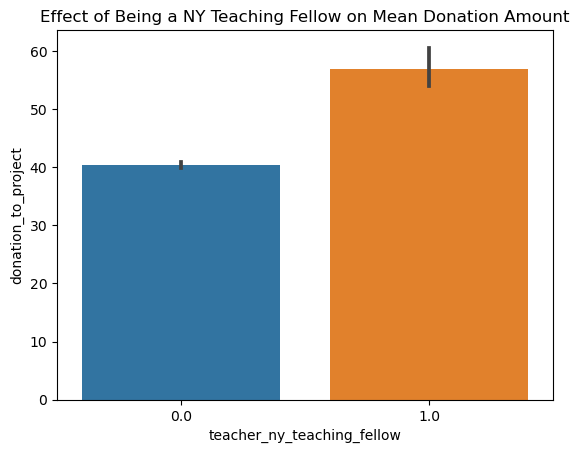

In [ ]:
# Visualize barplot of donation distribution
sns.barplot(teaching_fellow_na_removed, x='teacher_ny_teaching_fellow', y='donation_to_project', )
plt.title('Effect of Being a NY Teaching Fellow on Mean Donation Amount')
plt.show()

## Examine Impact of total_price_excluding_optional_support on Project Funding Completion Status

<Axes: xlabel='total_price_excluding_optional_support', ylabel='Density'>

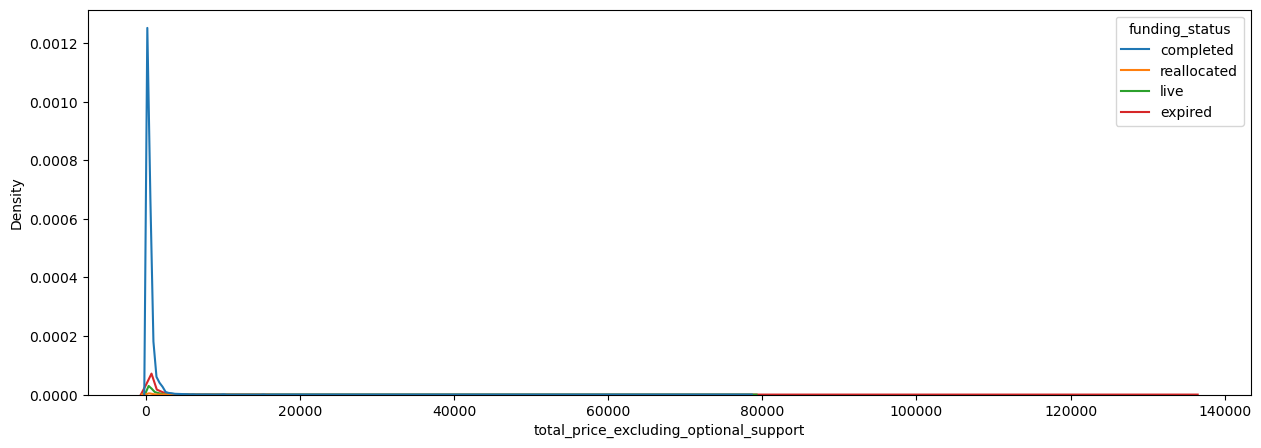

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=combined_df, x='total_price_excluding_optional_support', hue='funding_status')

/Users/wally/anaconda3/envs/amex/lib/python3.11/site-packages/matplotlib/scale.py:616: RuntimeWarning: overflow encountered in power
  return 1.0 / (1 + 10**(-a))


<Axes: xlabel='total_price_excluding_optional_support', ylabel='Density'>

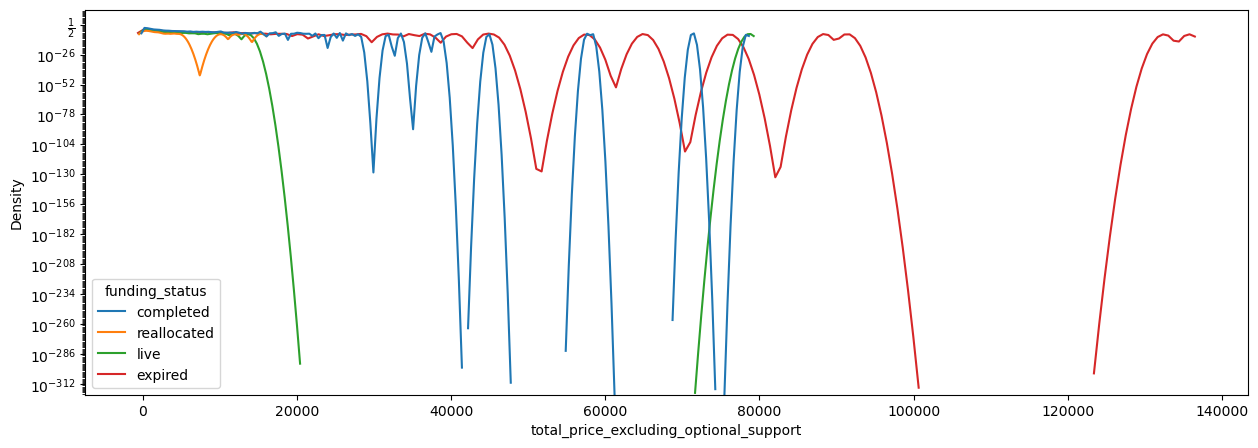

In [ ]:
# Using logit scale
plt.figure(figsize=(15,5))
plt.yscale('logit')
sns.kdeplot(data=combined_df, x='total_price_excluding_optional_support', hue='funding_status')

## Visualize Poverty Level and Focus Areas Distribution and Correlation with Fund Raising Success

/var/folders/qy/mhlfbdm940n8kbpppfc_whdh0000gn/T/ipykernel_6210/2127007643.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


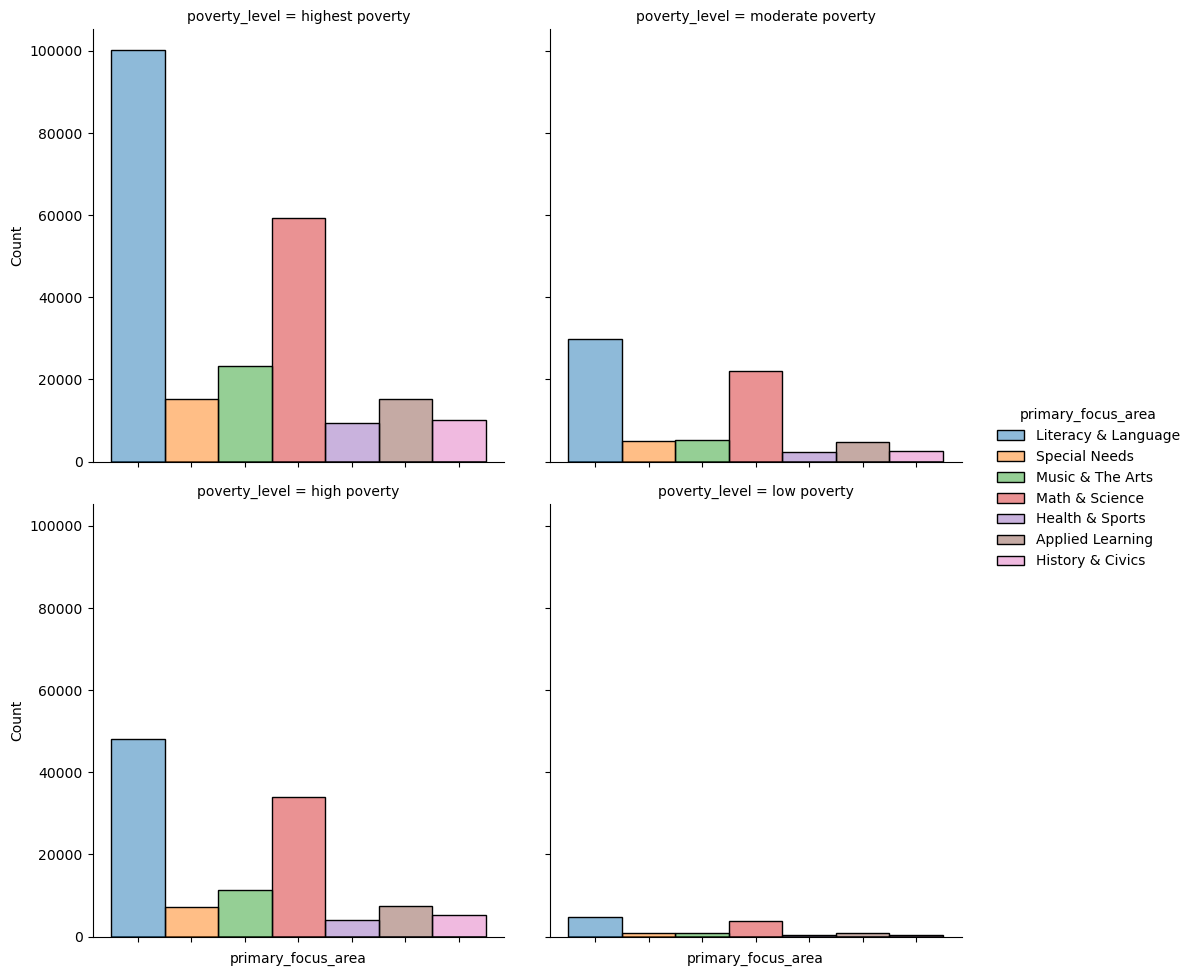

In [ ]:
g = sns.displot(data=combined_df, x='primary_focus_area', col='poverty_level', hue='primary_focus_area', col_wrap=2)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [ ]:
# Calculate percentage of successful funding completions for each category
success_percentages = combined_df.groupby(['primary_focus_area', 'poverty_level'])['funding_status'] \
    .apply(lambda x: (x == 'completed').mean() * 100) \
    .reset_index(name='success_percentage')

# Add a column with the count of each focus area within each poverty level
success_percentages['total count'] = combined_df.groupby(['primary_focus_area', 'poverty_level']).size().reset_index(name='count')['count']

success_percentages = success_percentages.sort_values('success_percentage', ascending=False)

success_percentages

,primary_focus_area,poverty_level,success_percentage,total count
8,History & Civics,high poverty,89.069811,5343
3,Applied Learning,moderate poverty,88.825032,4698
2,Applied Learning,low poverty,88.726790,754
9,History & Civics,highest poverty,88.496902,10006
21,Music & The Arts,highest poverty,88.189755,23251
11,History & Civics,moderate poverty,87.739752,2659
1,Applied Learning,highest poverty,87.640596,15292
13,Literacy & Language,highest poverty,87.473565,100244
15,Literacy & Language,moderate poverty,87.458525,29837
20,Music & The Arts,high poverty,87.231441,11450


________________________________________________________________________________________________

## Old Code for Aditi's Section

In [ ]:
import pandas as pd
project = pd.read_csv('project.csv')
max_num = project['num_donors'].max()
min_num = project['num_donors'].min()

FileNotFoundError: [Errno 2] No such file or directory: 'project.csv'

In [ ]:
donation = pd.read_csv('donation.csv')
donation

,donationid,projectid,donoracctid,donation_timestamp,donation_to_project,donation_optional_support,donation_total,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,is_teacher_referred,givingpageid,giving_page_type,for_honoree,thank_you_packet_mailed
0,1,273447,463236,2011-02-13 11:07:19,8.50,1.50,10.00,1,creditcard,0,0,0,0,0,NaN,NaN,0,0
1,2,499571,177636,2013-05-26 11:28:31,63.75,11.25,75.00,1,creditcard,0,0,0,1,0,NaN,NaN,0,0
2,3,330719,451294,2011-12-09 18:36:27,21.25,3.75,25.00,1,promo_code_match,0,0,0,0,0,NaN,NaN,0,0
3,4,157416,1248720,2009-10-23 10:57:21,20.50,4.50,25.00,1,no_cash_received,1,0,0,0,0,NaN,NaN,0,0
4,5,355850,1082798,2011-12-15 01:07:26,1817.36,320.71,2138.07,1,no_cash_received,1,0,0,0,0,579794.0,campaign,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211951,6211952,857690,881942,2015-10-20 16:53:52,17.00,3.00,20.00,1,promo_code_match,0,0,0,0,0,524959.0,campaign,0,1
6211952,6211953,1024386,1253124,2016-03-19 18:49:30,205.61,36.28,241.89,1,double_your_impact_match,0,0,0,0,0,NaN,NaN,0,0
6211953,6211954,342939,471328,2011-10-19 11:43:46,8.50,1.50,10.00,1,no_cash_received,1,0,0,0,1,566935.0,teacher,0,0
6211954,6211955,372341,2855587,2012-01-12 00:38:00,12.75,2.25,15.00,1,no_cash_received,0,1,0,0,0,NaN,NaN,0,0


In [ ]:
school = pd.read_csv('school.csv')
school.head()

,schoolid,ncesid,latitude,longitude,city,state,zip,metro,district,county,charter,magnet,year_round,nlns,kipp,charter_ready_promise
0,1,3.600097e+11,40.688454,-73.910432,New York City,NY,11207.0,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,0,0,0,0
1,2,3.600077e+11,40.765517,-73.960090,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
2,3,3.600077e+11,40.770233,-73.950760,New York City,NY,10075.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,1,0,0,0,0
3,4,3.600076e+11,40.727826,-73.978721,New York City,NY,10009.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
4,5,3.600083e+11,40.841216,-73.938605,New York City,NY,10032.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0


In [ ]:
account = pd.read_csv('account.csv',dtype={5: str}) #requires data type specification for column 5
account

,accountid,city,state,zip3,is_teacher,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow
0,1,NaN,NaN,NaN,1.0,Mr.,0.0,0.0
1,2,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
2,3,NaN,NaN,NaN,1.0,Ms.,0.0,0.0
3,4,NaN,NY,NaN,1.0,Ms.,0.0,0.0
4,5,NaN,NaN,NaN,1.0,Ms.,1.0,0.0
...,...,...,...,...,...,...,...,...
2855582,2855583,West Hollywood,CA,900.0,0.0,NaN,NaN,NaN
2855583,2855584,NaN,CA,956.0,0.0,NaN,NaN,NaN
2855584,2855585,NaN,NC,NaN,0.0,NaN,NaN,NaN
2855585,2855586,NaN,WI,530.0,0.0,NaN,NaN,NaN


In [ ]:
school.head()

,schoolid,ncesid,latitude,longitude,city,state,zip,metro,district,county,charter,magnet,year_round,nlns,kipp,charter_ready_promise
0,1,3.600097e+11,40.688454,-73.910432,New York City,NY,11207.0,urban,New York City Dept Of Ed,Kings (Brooklyn),0,1,0,0,0,0
1,2,3.600077e+11,40.765517,-73.960090,New York City,NY,10065.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
2,3,3.600077e+11,40.770233,-73.950760,New York City,NY,10075.0,NaN,New York City Dept Of Ed,New York (Manhattan),0,1,0,0,0,0
3,4,3.600076e+11,40.727826,-73.978721,New York City,NY,10009.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0
4,5,3.600083e+11,40.841216,-73.938605,New York City,NY,10032.0,urban,New York City Dept Of Ed,New York (Manhattan),0,0,0,0,0,0


In [ ]:
school.describe()

,schoolid,ncesid,latitude,longitude,zip,charter,magnet,year_round,nlns,kipp,charter_ready_promise
count,73206.00000,6.674000e+04,73206.000000,73206.000000,73204.000000,73206.000000,73206.000000,73206.000000,73206.000000,73206.000000,73206.000000
mean,36603.50000,2.795828e+11,37.658730,-92.789955,53294.744659,0.079010,0.051157,0.018947,0.003893,0.002336,0.001052
std,21132.89624,1.611665e+11,5.111759,16.266801,29178.398242,0.269756,0.220319,0.136337,0.062274,0.048275,0.032415
min,1.00000,1.105600e+04,18.249140,-176.657578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18302.25000,1.300420e+11,33.953162,-99.759190,29403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36603.50000,2.733510e+11,38.332527,-88.158824,53035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54904.75000,4.203915e+11,41.272408,-80.744090,78550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,73206.00000,6.300022e+11,71.299458,-66.628036,99950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
school.columns

Index(['schoolid', 'ncesid', 'latitude', 'longitude', 'city', 'state', 'zip',
       'metro', 'district', 'county', 'charter', 'magnet', 'year_round',
       'nlns', 'kipp', 'charter_ready_promise'],
      dtype='object')

In [ ]:
school['city'].value_counts()

city
New York City    2221
Chicago           806
Houston           726
Los Angeles       713
Philadelphia      385
                 ... 
Belmond             1
Olalla              1
Ojo Caliente        1
Blackduck           1
Holdrege            1
Name: count, Length: 10293, dtype: int64

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
#to display plots inside the Jupyter notebook
%matplotlib inline 

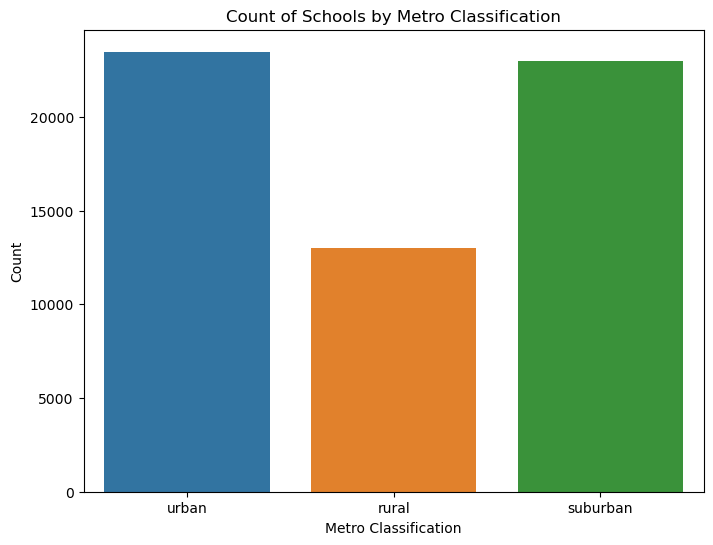

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=school, x='metro')
plt.title('Count of Schools by Metro Classification')
plt.xlabel('Metro Classification')
plt.ylabel('Count')
plt.show()

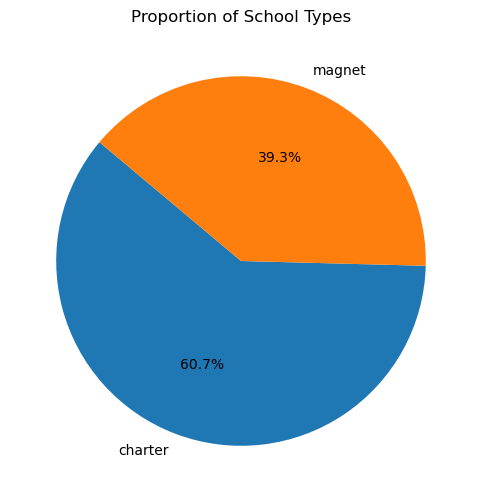

In [ ]:
plt.figure(figsize=(8, 6))
school_type_counts = school[['charter', 'magnet']].sum()
plt.pie(school_type_counts, labels=school_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of School Types')
plt.show()

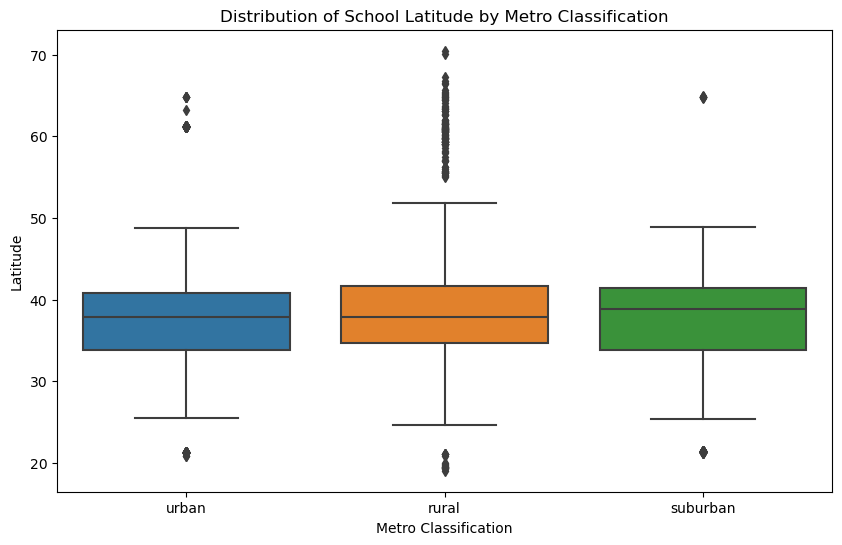

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=school, x='metro', y='latitude')
plt.title('Distribution of School Latitude by Metro Classification')
plt.xlabel('Metro Classification')
plt.ylabel('Latitude')
plt.show()

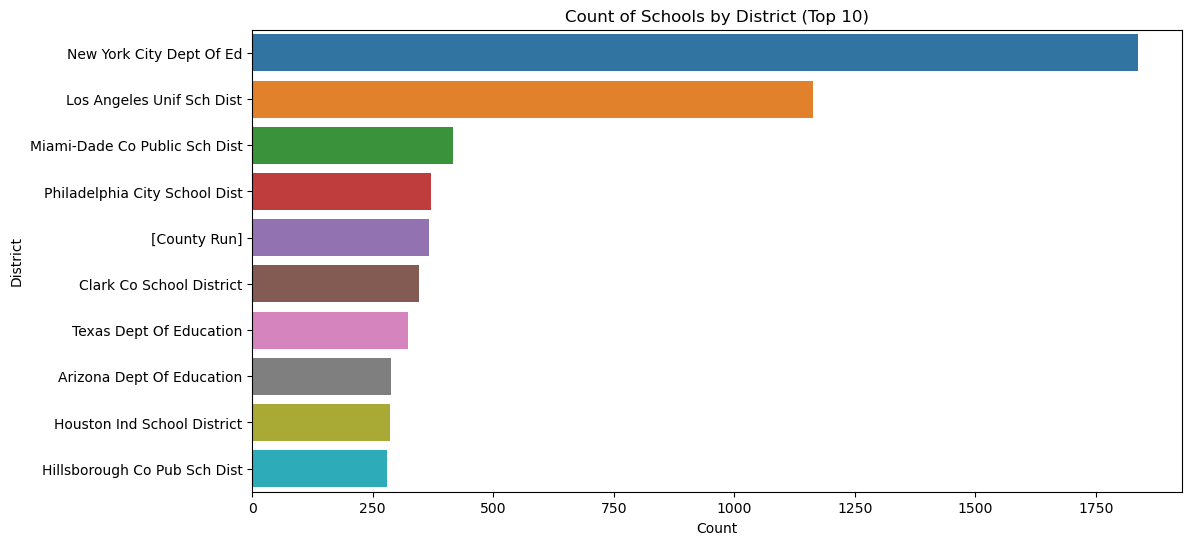

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=school, y='district', order=school['district'].value_counts().index[:10])
plt.title('Count of Schools by District (Top 10)')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


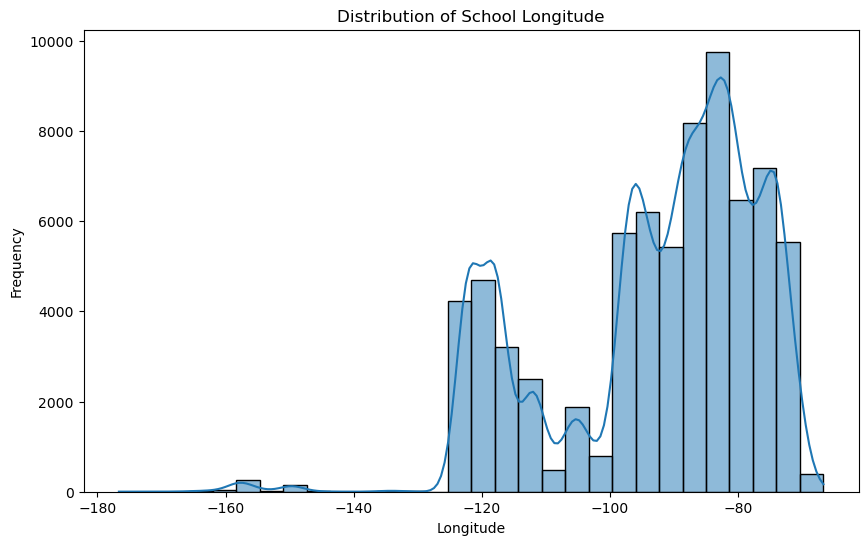

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=school, x='longitude', bins=30, kde=True)
plt.title('Distribution of School Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

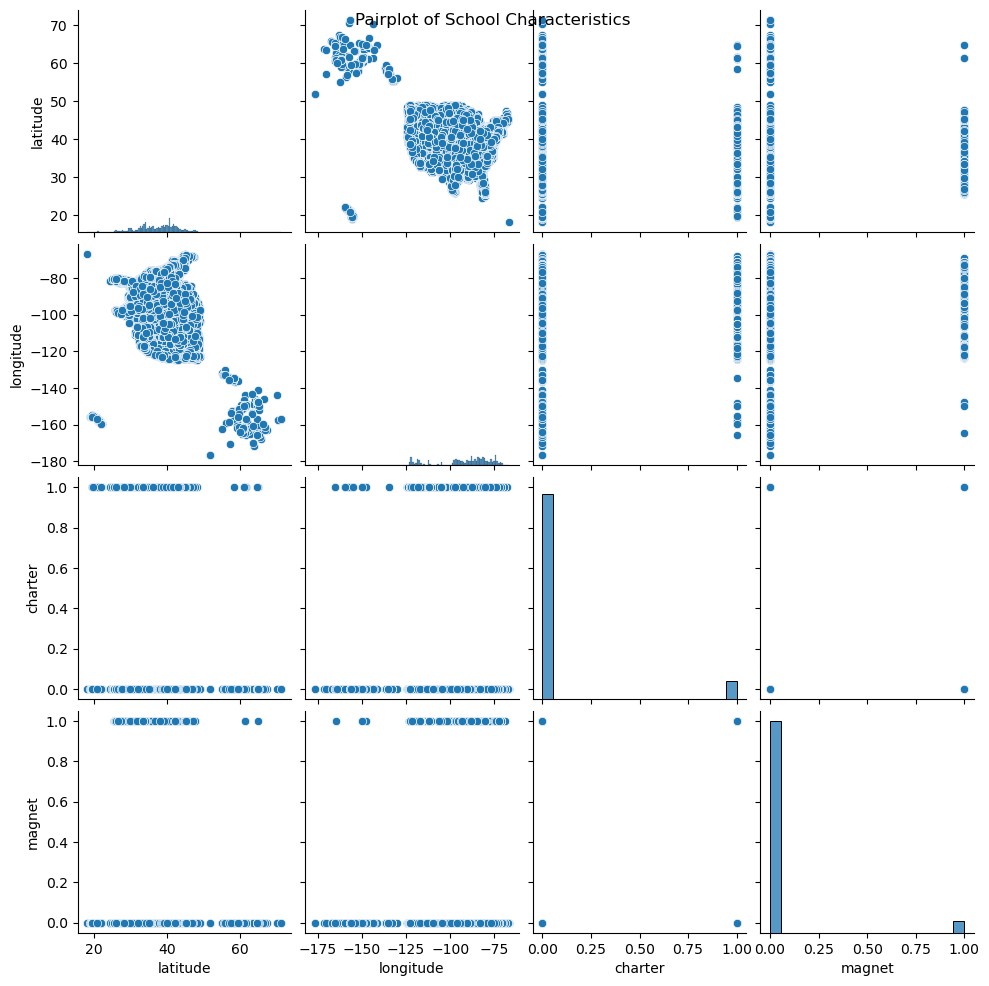

In [ ]:
numerical_cols = ['latitude', 'longitude', 'charter', 'magnet']

sns.pairplot(school[numerical_cols])
plt.suptitle('Pairplot of School Characteristics')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the coordinates of the schools
map_schools_heatmap = folium.Map(location=[school['latitude'].mean(), school['longitude'].mean()], zoom_start=5)

# Convert school locations to a list of tuples
school_locations = list(zip(school['latitude'], school['longitude']))

# Add heatmap layer
HeatMap(school_locations).add_to(map_schools_heatmap)

# Display the map
map_schools_heatmap

In [ ]:
merged_data = pd.merge(project, school, on='schoolid', how='left')

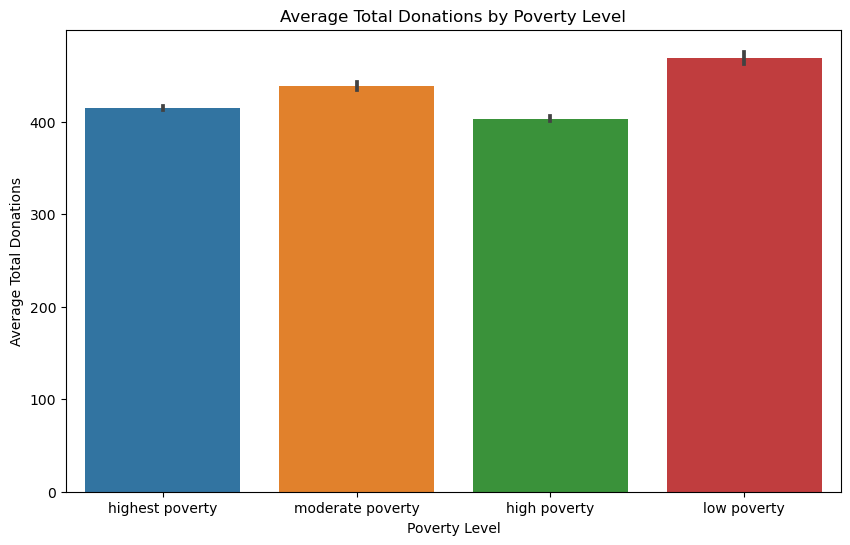

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='poverty_level', y='total_donations', estimator='mean')
plt.title('Average Total Donations by Poverty Level')
plt.xlabel('Poverty Level')
plt.ylabel('Average Total Donations')
plt.show()

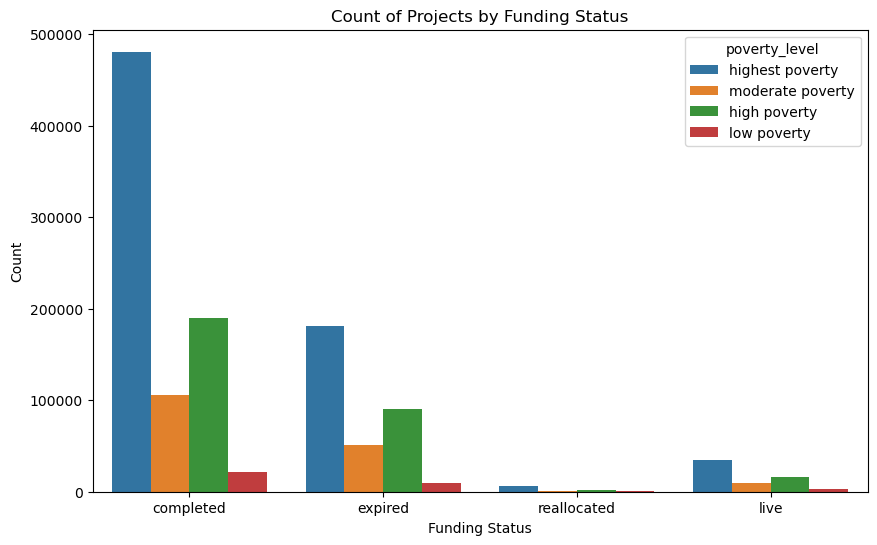

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='funding_status', hue = 'poverty_level')
plt.title('Count of Projects by Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Count')
plt.show()

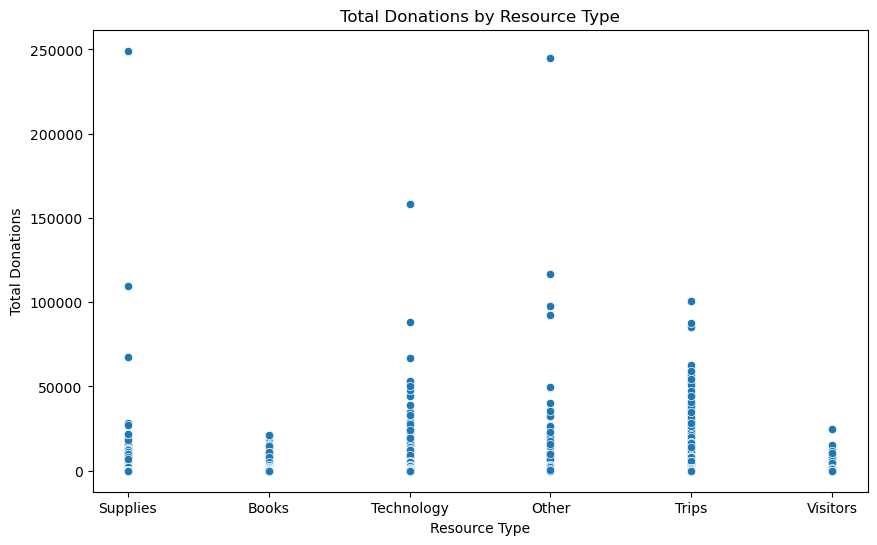

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='resource_type', y='total_donations')
plt.title('Total Donations by Resource Type')
plt.xlabel('Resource Type')
plt.ylabel('Total Donations')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='metro', y='total_donations')
plt.title('Total Donations by Metro Type')
plt.xlabel('Metro Type')
plt.ylabel('Total Donations')
plt.show()

NameError: name 'merged_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=merged_data, x='metro', y='total_donations')
plt.title('Total Donations by Metro Type')
plt.xlabel('Metro Type')
plt.ylabel('Total Donations')
plt.show()

NameError: name 'merged_data' is not defined

<Figure size 1000x600 with 0 Axes>

________________________________________________________________________________________________

## Old Code for Wally's Section

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
donation[["donation_to_project", "donation_optional_support", "donation_total"]].describe()

,donation_to_project,donation_optional_support,donation_total
count,6211956.00,6211956.00,6211956.00
mean,69.73,10.94,80.66
std,247.89,37.82,280.89
min,-12.75,-2.25,-15.00
25%,10.00,1.50,10.00
50%,21.25,3.75,25.00
75%,53.76,7.50,61.20
max,147204.00,21996.00,169200.00


<Axes: xlabel='payment_method', ylabel='count'>

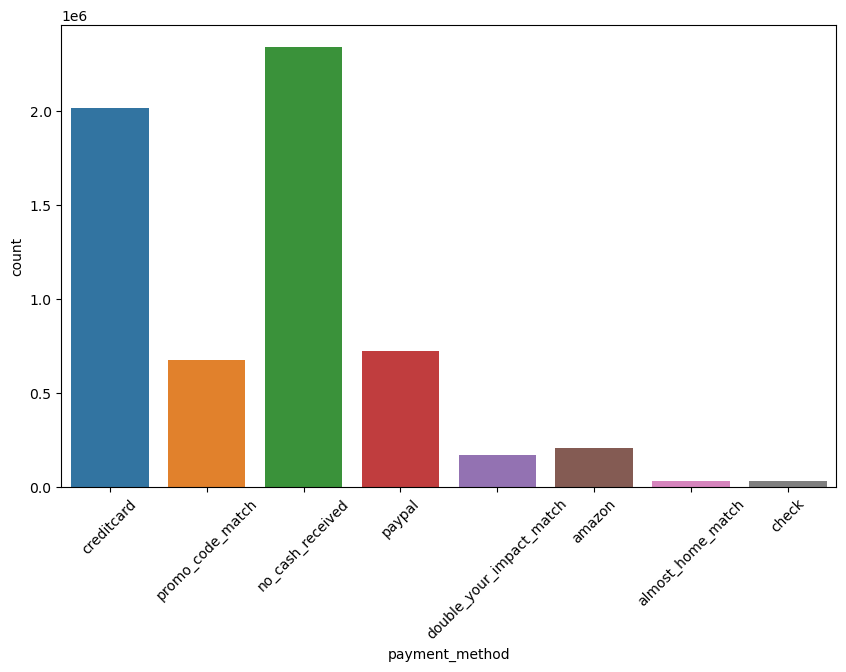

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.countplot(data=donation, x='payment_method')

<Axes: xlabel='payment_method', ylabel='donation_to_project'>

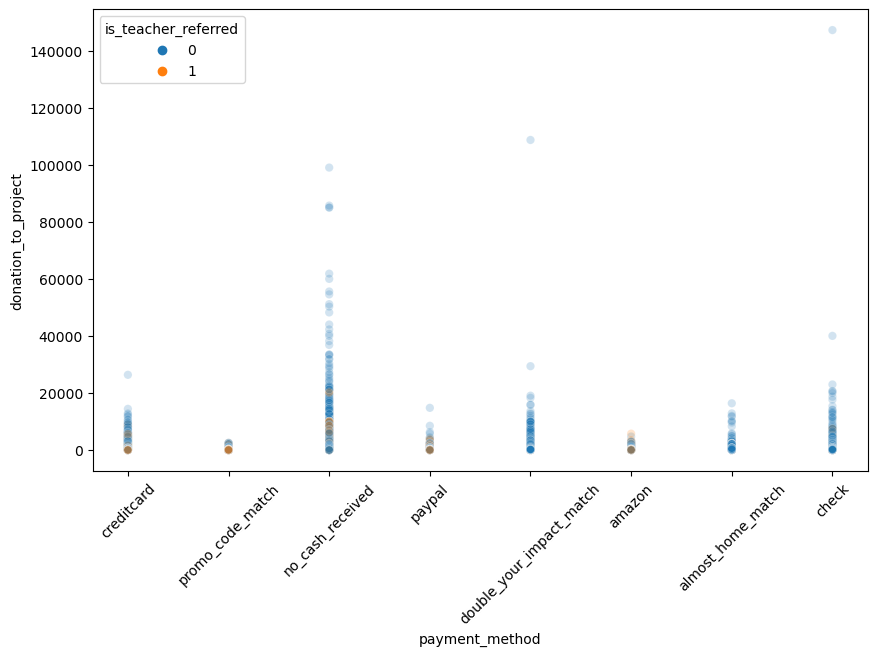

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.scatterplot(data=donation, x='payment_method', y='donation_to_project', hue='is_teacher_referred', alpha=0.2)

In [ ]:
donation_df = donation.drop(columns=['projectid', 'donoracctid', 'donation_timestamp', 'givingpageid'])

In [ ]:
donation_df = pd.get_dummies(donation_df, columns=["giving_page_type", "payment_method"])

In [ ]:
donation_df.head()

,donationid,donation_to_project,donation_optional_support,donation_total,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,is_teacher_referred,...,giving_page_type_campaign,giving_page_type_teacher,payment_method_almost_home_match,payment_method_amazon,payment_method_check,payment_method_creditcard,payment_method_double_your_impact_match,payment_method_no_cash_received,payment_method_paypal,payment_method_promo_code_match
0,1,8.50,1.50,10.00,1,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,2,63.75,11.25,75.00,1,0,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
2,3,21.25,3.75,25.00,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,4,20.50,4.50,25.00,1,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,5,1817.36,320.71,2138.07,1,1,0,0,0,0,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
data_train, data_test = train_test_split(donation_df)

In [ ]:
X_train, X_test = data_train.drop(columns=["donation_total", "donation_to_project", "donation_optional_support"]), data_test.drop(columns=["donation_total", "donation_to_project", "donation_optional_support"])

y_train, y_test = data_train["donation_total"], data_test["donation_total"]

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
len(data_test['donationid'])

1552989

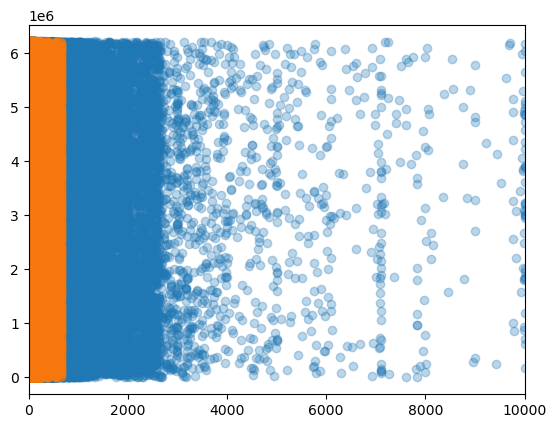

In [ ]:
plt.scatter(data_test['donation_total'], data_test['donationid'], alpha=0.3)
plt.scatter(y_pred, data_test['donationid'], alpha=0.1)
plt.xlim(0, 10000)  # Set the limit for x-axis
plt.show()